In [1]:
import numpy as np

import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb

In [7]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import catboost as cb

In [9]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [10]:
import lightgbm as lgb

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
df=pd.read_csv("C:/Users/angel/Downloads/Task 3- Flight Price Prediction Task.csv")

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
df.describe(include='all').T #Transposing the axes

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL ? BOM ? COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
#Central Function to Prepare the Process data & Model data
def preprocess(data):
    """
    Function to Process data and get the process data & Modeling data
    """
    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)
    
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
    df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
    df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
    df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday
    
    df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
    df['Total_Stops'] = df['Total_Stops'].replace('1 stop', '1')
    df['Total_Stops'] = df['Total_Stops'].replace('2 stops', '2')
    df['Total_Stops'] = df['Total_Stops'].replace('3 stops', '3')
    df['Total_Stops'] = df['Total_Stops'].replace('4 stops', '4')
    
    df['Destination'] = np.where(df['Destination'] == 'New Delhi', 'Delhi', df['Destination'])
    df['Airline'] = np.where(df['Airline'] == 'Jet Airways Business','Jet Airways',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Vistara Premium economy','Vistara',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',df['Airline'])
    
    
    arrival_time = []
    for i in data["Arrival_Time"]:
        arrival_time.append(i[:5])
    df['Arrival_Time'] = arrival_time
    df['Arrival_Time_hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
    df['Arrival_Time_minutes'] = pd.DatetimeIndex(df['Arrival_Time']).minute
    
    df['Duration_Total_Hour'] = df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info','Route'], axis =1, inplace = True)
    return data, data1

In [17]:
### Get The EDA & Model Data
data_eda, data_model = preprocess(df)

In [18]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,2.833333,0,...,0,0,0,0,0,0,0,1,0,0
1,7h 25m,2,7662,5,1,5,13,15,7.416667,1,...,0,0,0,0,1,0,0,0,0,0
2,19h,2,13882,6,9,4,4,25,19.000000,0,...,0,0,0,1,0,0,1,0,0,0
3,5h 25m,1,6218,5,12,3,23,30,5.416667,0,...,0,0,0,0,1,0,0,0,0,0
4,4h 45m,1,13302,3,1,3,21,35,4.750000,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,2,22,25,2.500000,0,...,0,0,0,0,1,0,0,0,0,0
10679,2h 35m,0,4145,27,4,5,23,20,2.583333,1,...,0,0,0,0,1,0,0,0,0,0
10680,3h,0,7229,27,4,5,11,20,3.000000,0,...,0,0,0,0,0,0,0,1,0,0
10681,2h 40m,0,12648,3,1,3,14,10,2.666667,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
### Get The EDA & Model Data
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR ? DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,6,1,10,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,13,15,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2,No info,13882,6,9,4,4,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,3,23,30,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,3,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,No info,4107,4,9,2,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,5,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,No info,7229,27,4,5,11,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,No info,12648,3,1,3,14,10,2.666667


C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


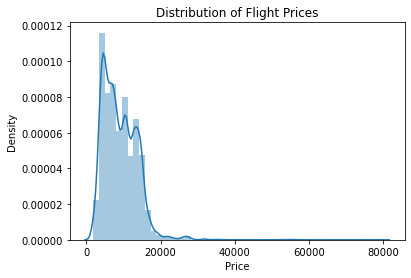

In [20]:
#Univariate Exploratory Data Analysis
# Histogram for 'price'
sns.distplot(data_eda['Price'])
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

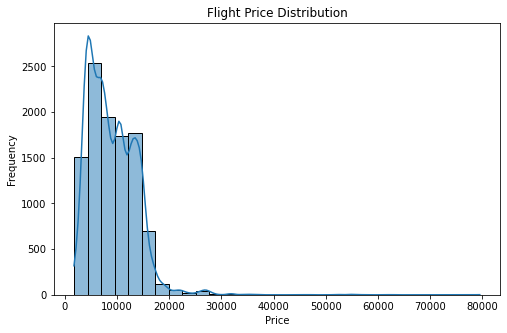

In [21]:
# Create a histogram to visualize the distribution of flight prices
plt.figure(figsize=(8, 5))
sns.histplot(data_eda['Price'], kde=True, bins=30)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


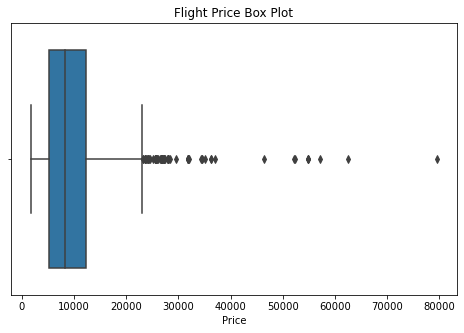

In [22]:
# Create a box plot to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data_eda['Price'])
plt.title("Flight Price Box Plot")
plt.xlabel("Price")
plt.show()


C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


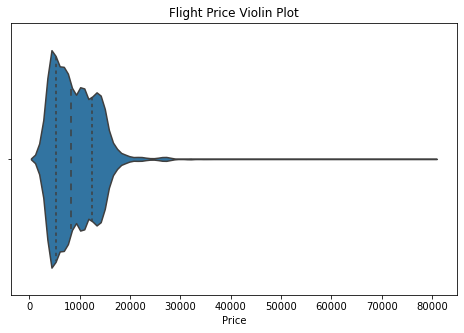

In [23]:
# Create a violin plot for a more detailed distribution view
plt.figure(figsize=(8, 5))
sns.violinplot(data_eda["Price"], inner="quartile")
plt.title("Flight Price Violin Plot")
plt.xlabel("Price")
plt.show()

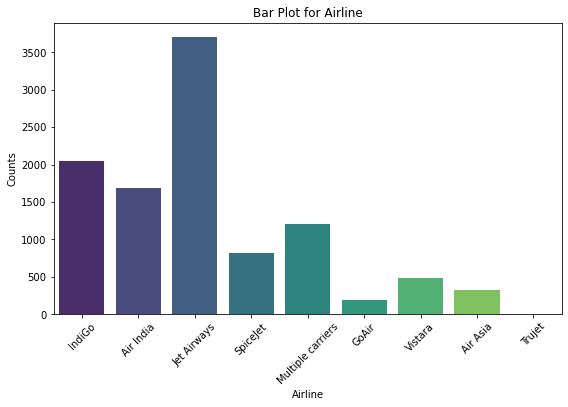

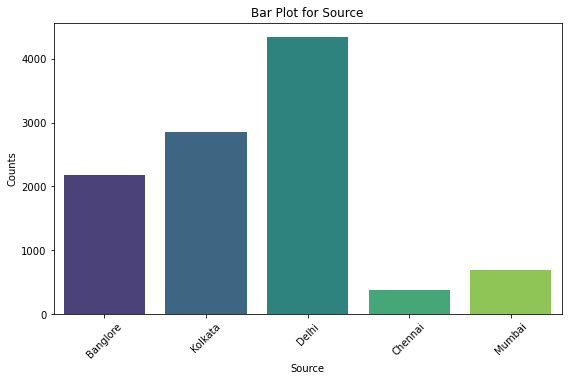

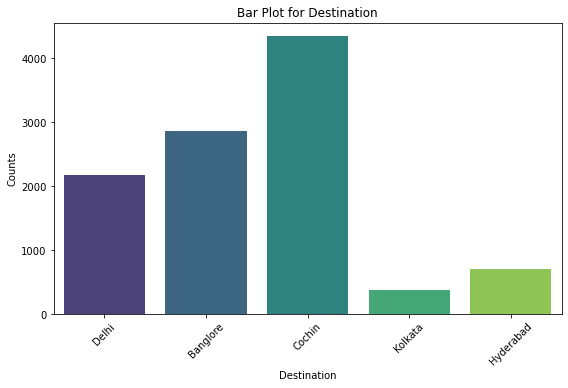

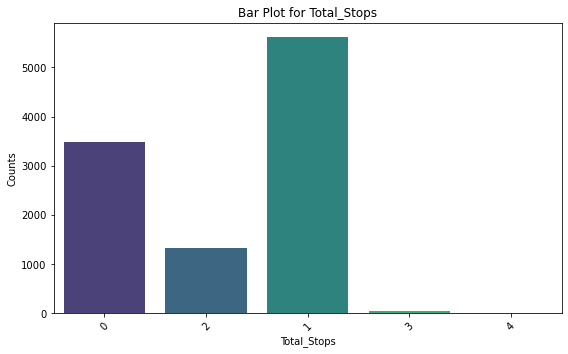

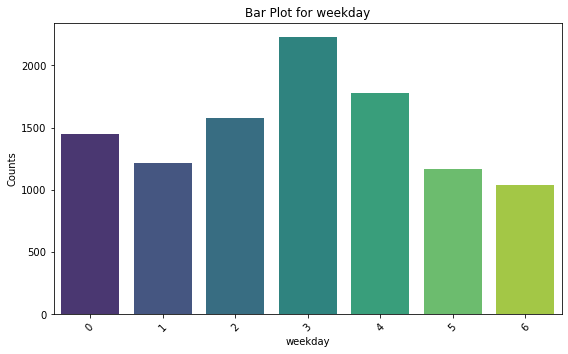

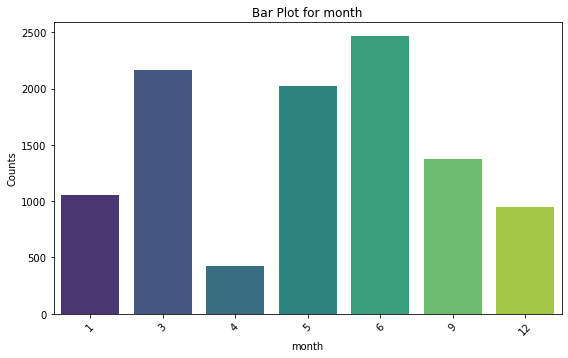

In [24]:
#Airline	Date_of_Journey	Source	Destination	Route	Dep_Time	Arrival_Time	Duration	Total_Stops	Additional_Info	Price	day	month	weekday	Arrival_Time_hour	Arrival_Time_minutes	Duration_Total_Hour
seg_data = ['Airline','Source','Destination','Total_Stops','weekday','month']
for edcol in seg_data:
    plt.figure(figsize=(8, 5))
    # Creating a count plot using seaborn
    sns.countplot(x=data_eda[edcol], palette="viridis")
    
    plt.xlabel(edcol)
    plt.ylabel('Counts')
    plt.title(f'Bar Plot for {edcol}')
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.xticks(rotation=45)
    # Display the plot
    plt.show()
    #print(data_eda[edcol].value_counts())
    #print(data_eda[edcol].index)
    #print(data_eda[edcol].values)

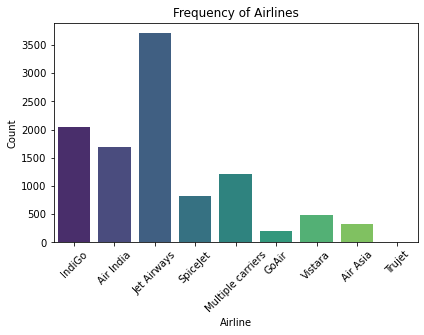

In [25]:
# Univariate EDA for categorical variables

# Count plot for 'airline'
sns.countplot(x=data_eda['Airline'], palette="viridis")
plt.title('Frequency of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

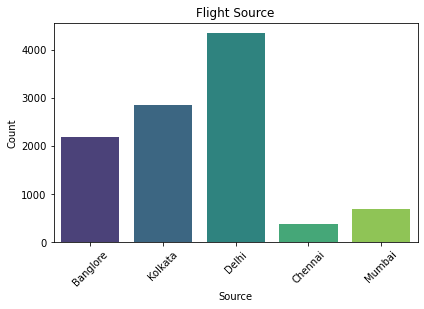

In [26]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Source'], palette="viridis")
plt.title('Flight Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<bound method IndexOpsMixin.value_counts of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10462, dtype: object>


<AxesSubplot:xlabel='Source', ylabel='count'>

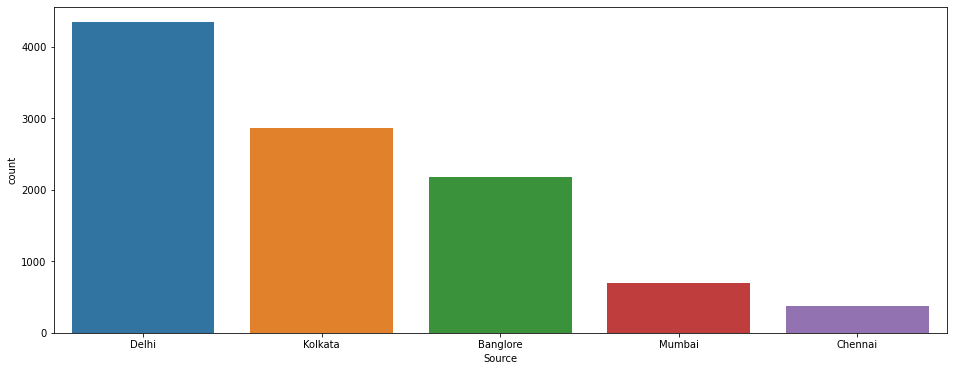

In [27]:
plt.figure(figsize=(16,6))
print(data_eda['Source'].value_counts)
sns.countplot(x="Source",data=data_eda,order=data_eda['Source'].value_counts().index)

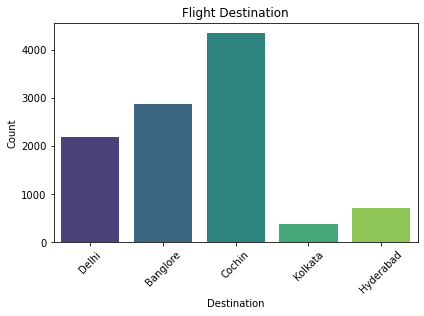

In [28]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Destination'], palette="viridis")
plt.title('Flight Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


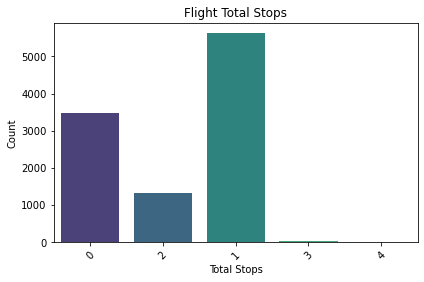

In [29]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Total_Stops'], palette="viridis")
plt.title('Flight Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

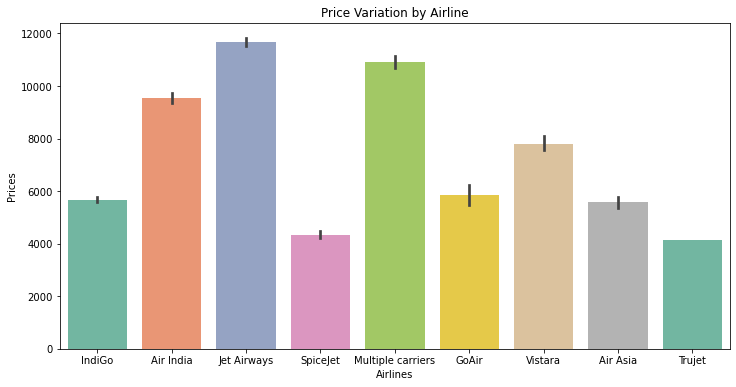

In [30]:
plt.figure(figsize=(12,6),)
sns.barplot(x='Airline',y='Price', data=df ,palette='Set2' )
plt.title('Price Variation by Airline')
plt.xlabel('Airlines')
plt.ylabel('Prices')
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Price'>

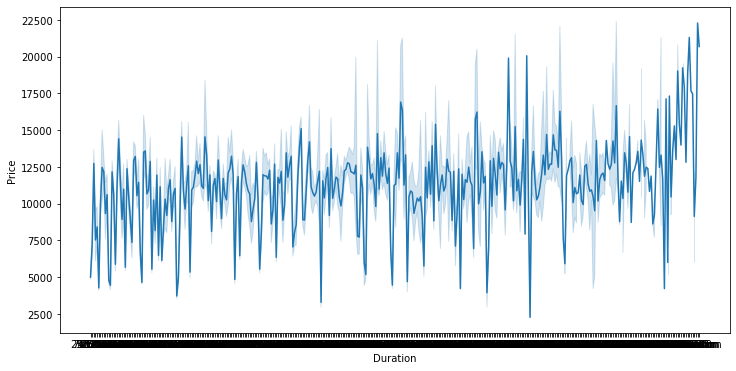

In [31]:
# how tickets price is affected when bought 1 or 2 days before departure
plt.figure(figsize=(12,6))
sns.lineplot(x='Duration',y='Price' ,data=df)

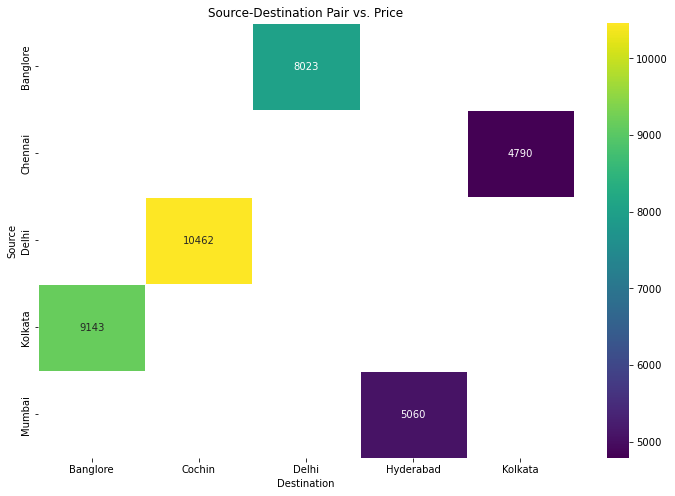

In [32]:
plt.figure(figsize=(12, 8))
heatmap_data = data_eda.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Source-Destination Pair vs. Price')
plt.show()


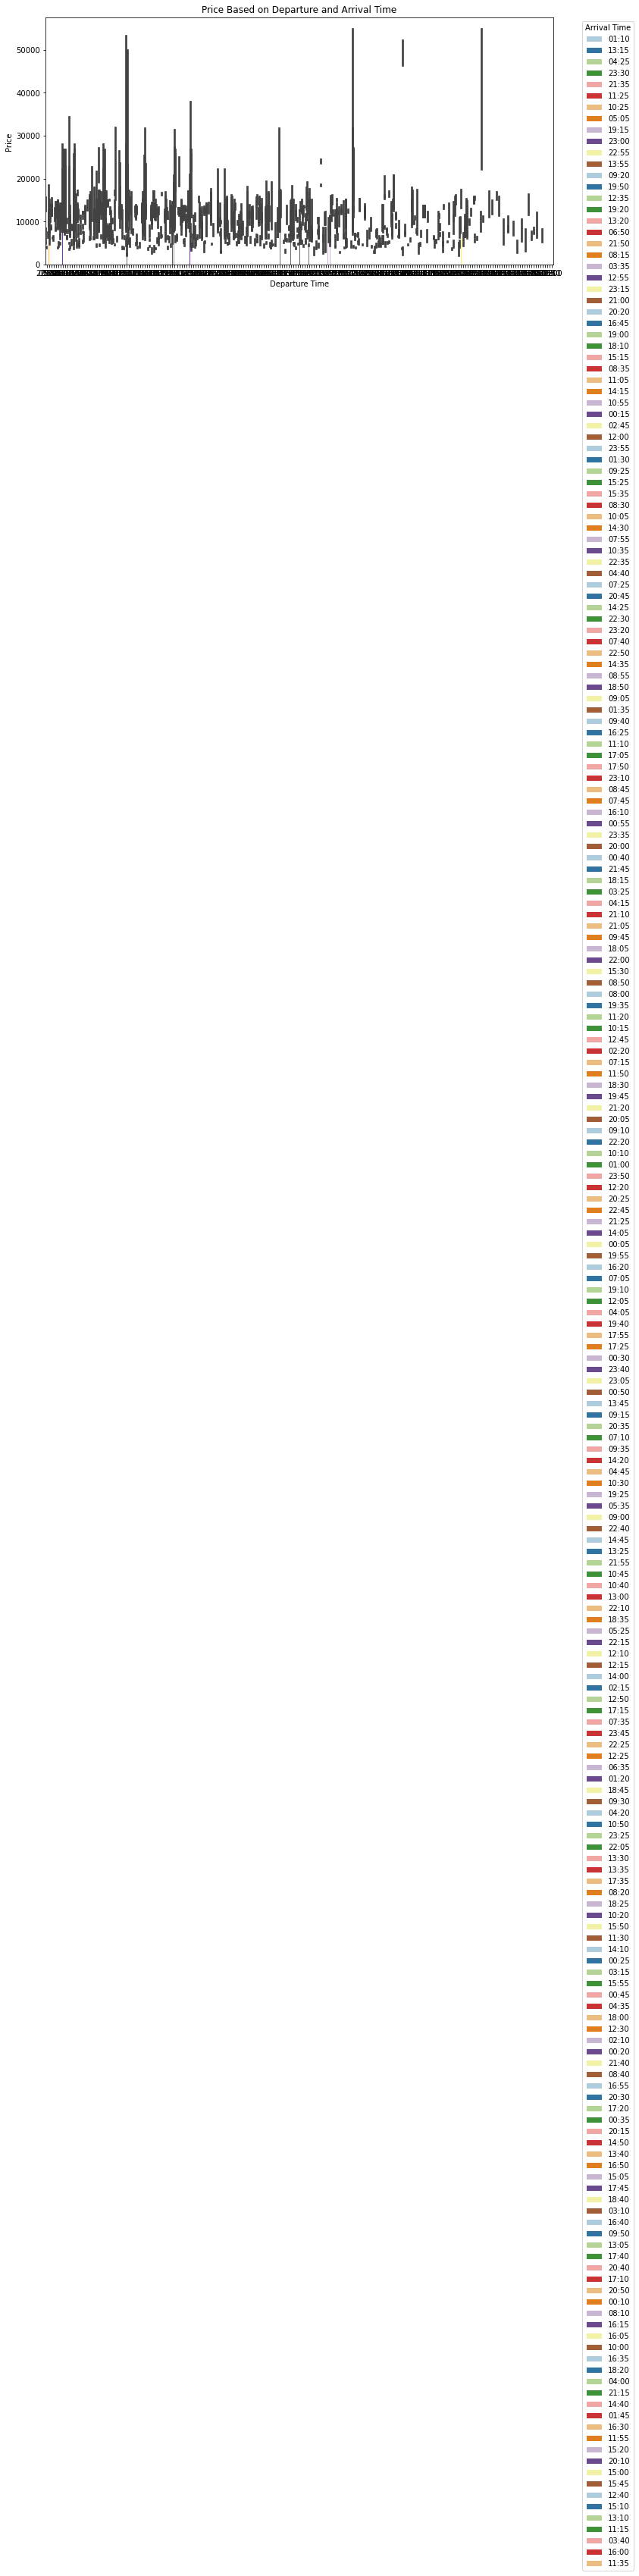

In [33]:
 #Does ticket price change based on departure and arrival time
plt.figure(figsize=(12, 6))
sns.barplot(x='Dep_Time', y='Price', hue='Arrival_Time', data=df, palette='Paired')
plt.title('Price Based on Departure and Arrival Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='sd'>

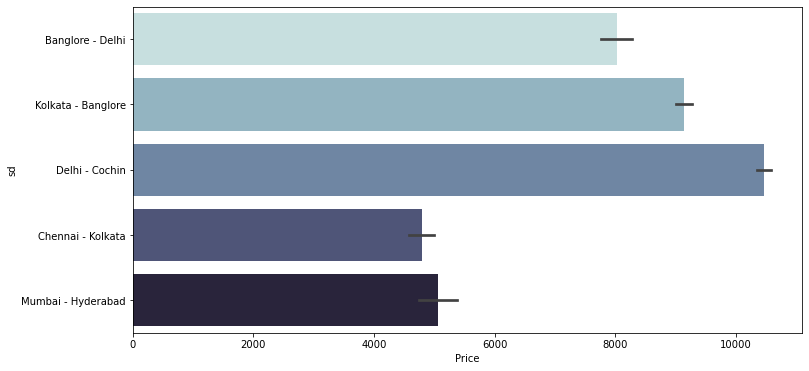

In [34]:
# how does price change with change in source and destination
plt.figure(figsize=(12,6))
df['sd']=df['Source'] +' - '+ df['Destination']
sns.barplot(y='sd',x='Price', data =df, palette='ch:start=.2,rot=-.3')

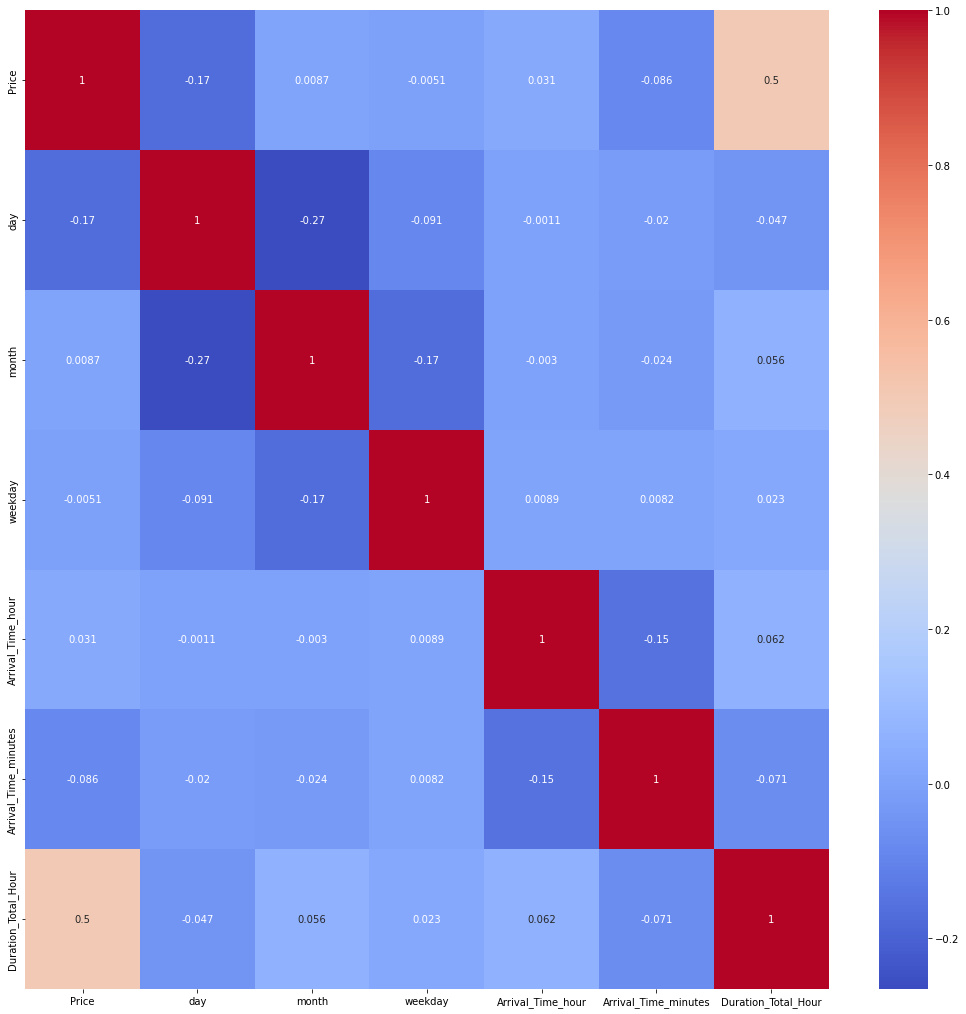

In [35]:
plt.figure(figsize = (18,18))

sns.heatmap(data_eda.corr(),annot= True, cmap = "coolwarm")

plt.show()

In [36]:
X = data_model.drop(['Price','Duration'],axis=1)
y = data_model['Price']

In [37]:
#Modeling:
from sklearn.model_selection import train_test_split

In [38]:
# 60% Train - 20% Val - 20% Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor()

In [40]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor()

<AxesSubplot:xlabel='importance', ylabel='feature'>

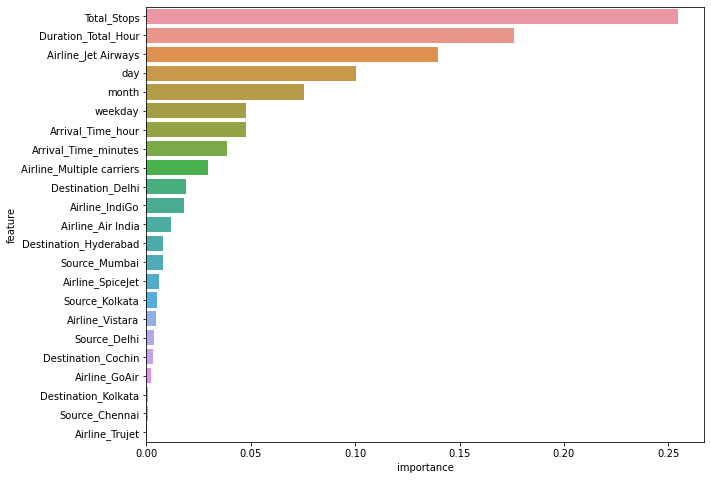

In [41]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature':x_columns, 'importance':extractor.feature_importances_})
feature_rank = feature_rank.sort_values('importance',ascending =  False)
plt.figure(figsize=(10,8))
sns.barplot(x='importance',y='feature',data=feature_rank)

In [42]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100
feature_rank.head(15)

,feature,importance,cumsum
0,Total_Stops,0.254637,25.463711
6,Duration_Total_Hour,0.175914,43.055153
10,Airline_Jet Airways,0.139660,57.021171
1,day,0.100581,67.079317
2,month,0.075261,74.605440
3,weekday,0.047544,79.359859
4,Arrival_Time_hour,0.047505,84.110359
5,Arrival_Time_minutes,0.038531,87.963426
11,Airline_Multiple carriers,0.029677,90.931154
20,Destination_Delhi,0.018763,92.807420
